Data Description
The dataset includes the following variables:

1. Date: The date of the observation.
2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
3. Automobile_Sales: The number of vehicles sold during the period.
4. GDP: The per capita GDP value in USD.
5. Unemployment_Rate: The monthly unemployment rate.
6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
8. Price: The average vehicle price during the period.
9. Advertising_Expenditure: The advertising expenditure of the company.
10. Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
11. Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
12. Month: Month of the observation extracted from Date.
13. Year: Year of the observation extracted from Date.

This Project will be completed in 3 Parts:

 - Part 1: Create Visualizations using Matplotlib, Seaborn & Folium
 - Part 2: Create Dashboard using Plotly and Dash
 - Part 3: Submit your project and evaluate your peers

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import requests

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
local_path = "./historical_automobile_sales.csv"

request = requests.get(URL)

if(request.status_code == 200):
    with open(local_path, 'wb') as file:
        file.write(request.content)
    print('Download success')
else:
    print(f'Error, status code {request.status_code}')

path = 'historical_automobile_sales.csv'

Download success


In [4]:
df =  pd.read_csv(path)
print(df.shape)
df.head(2)

(528, 15)


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


In [5]:
print(df.columns)
df.describe()

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


# Creating Visualizations for Data Analysis

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


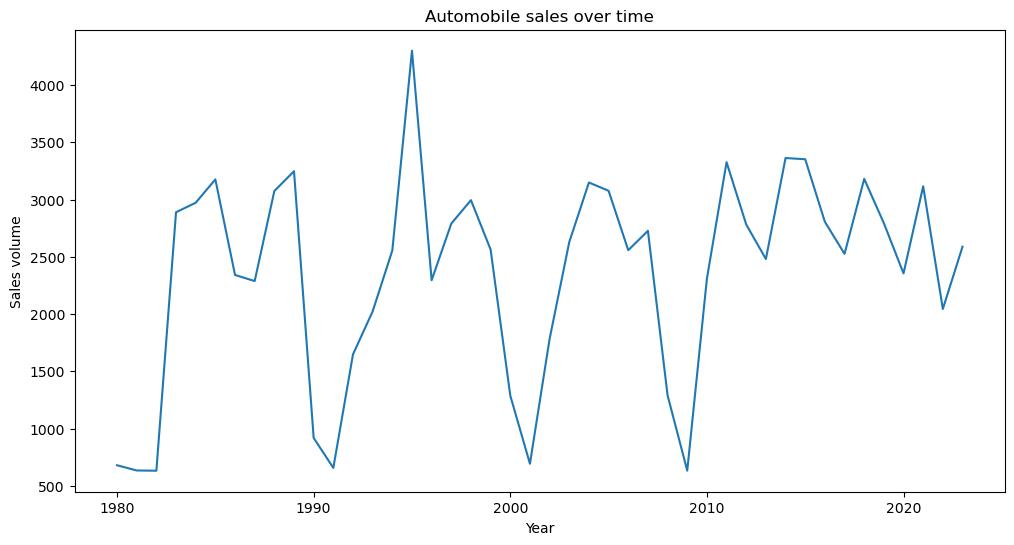

In [6]:
df_sale = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(12, 6))

df_sale.plot(kind='line', x=df_sale.index, y=df_sale.values)

plt.xlabel('Year')
plt.ylabel('Sales volume')
plt.title('Automobile sales over time')

plt.show()

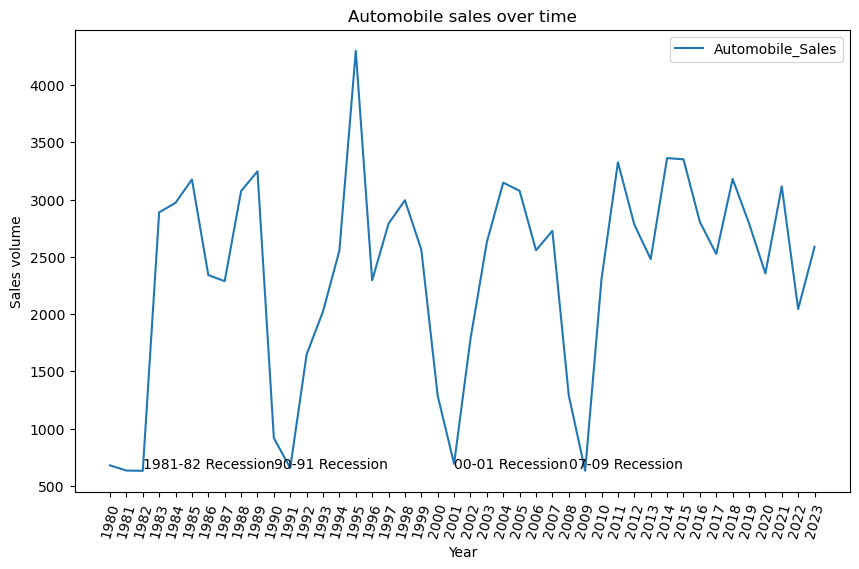

In [7]:
plt.figure(figsize=(10, 6))
df_sale = df.groupby('Year')['Automobile_Sales'].mean()
df_sale.plot(kind = 'line')

plt.xticks(list(range(1980,2024)), rotation = 75)

plt.xlabel('Year')
plt.ylabel('Sales volume')
plt.title('Automobile sales over time')

plt.text(1982, 650, '1981-82 Recession')
plt.text(1990, 650, '90-91 Recession')
plt.text(2001, 650, '00-01 Recession')
plt.text(2008, 650, '07-09 Recession')

plt.legend()
plt.show()


####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


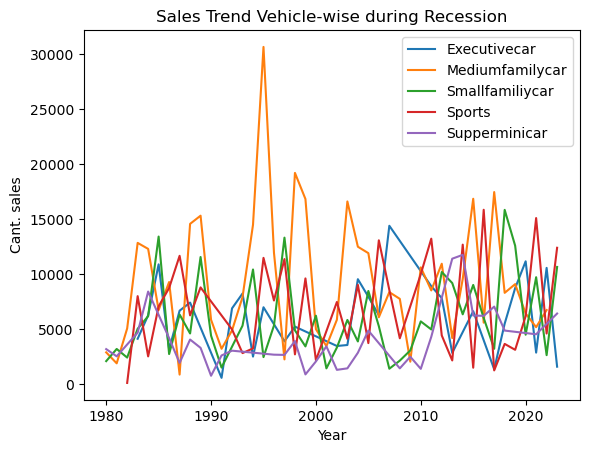

In [8]:
df_Mline = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby('Vehicle_Type')['Automobile_Sales']

df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Cant. sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()

plt.show()

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


In [10]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
new_df

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


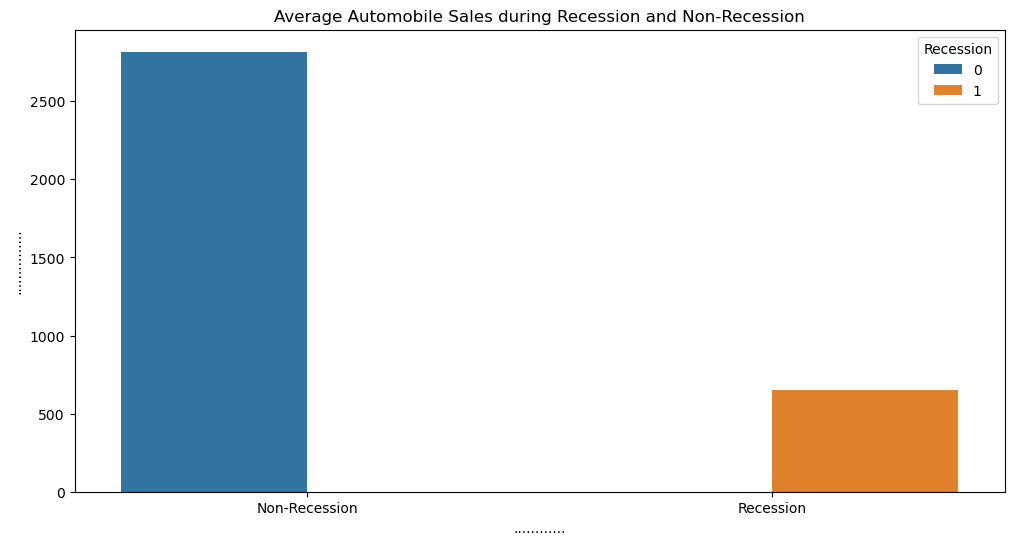

In [11]:
plt.figure(figsize=(12, 6))
new_df['Recession'] = new_df['Recession'].astype(str)
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('............')
plt.ylabel('...............')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization


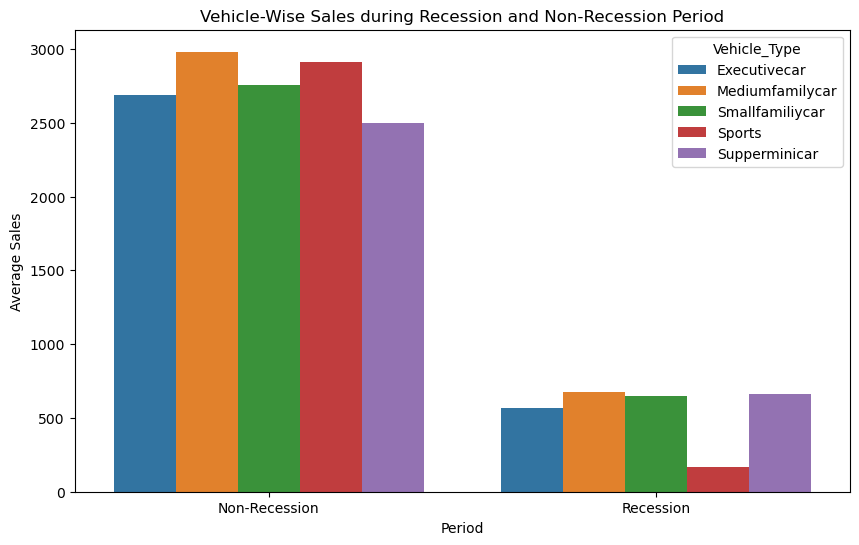

In [12]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


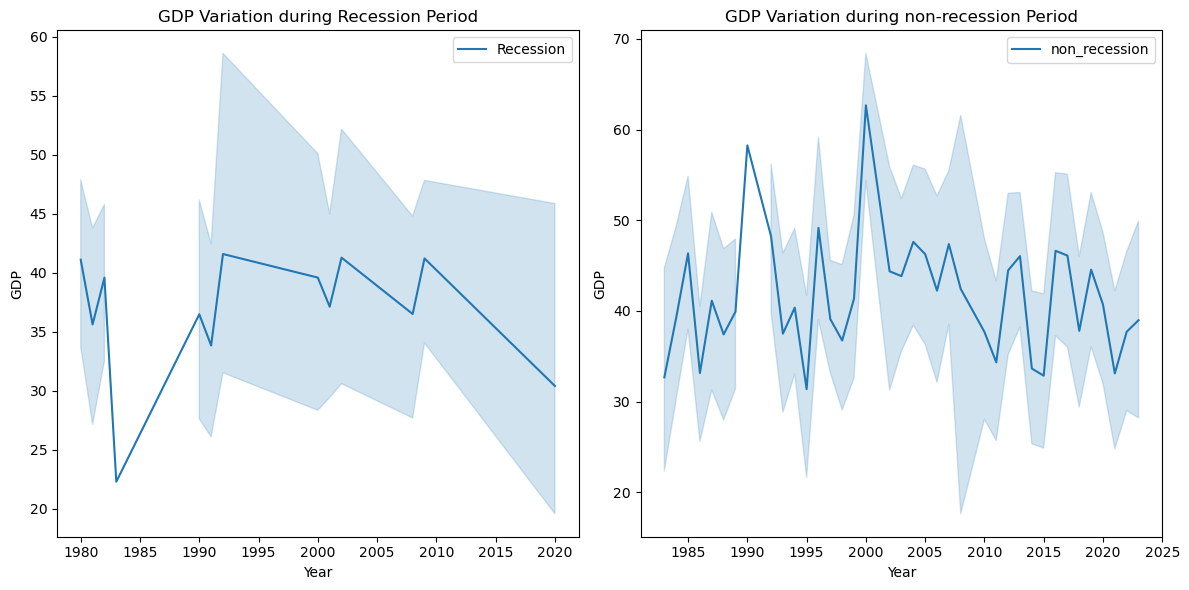

In [13]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig = plt.figure(figsize=(12, 6))

# Different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) #1row, 2 columns, plot 1
ax1 = fig.add_subplot(1, 2, 2) #1 row, 2 columns, plot 2

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='non_recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during non-recession Period')

plt.tight_layout()
plt.show()

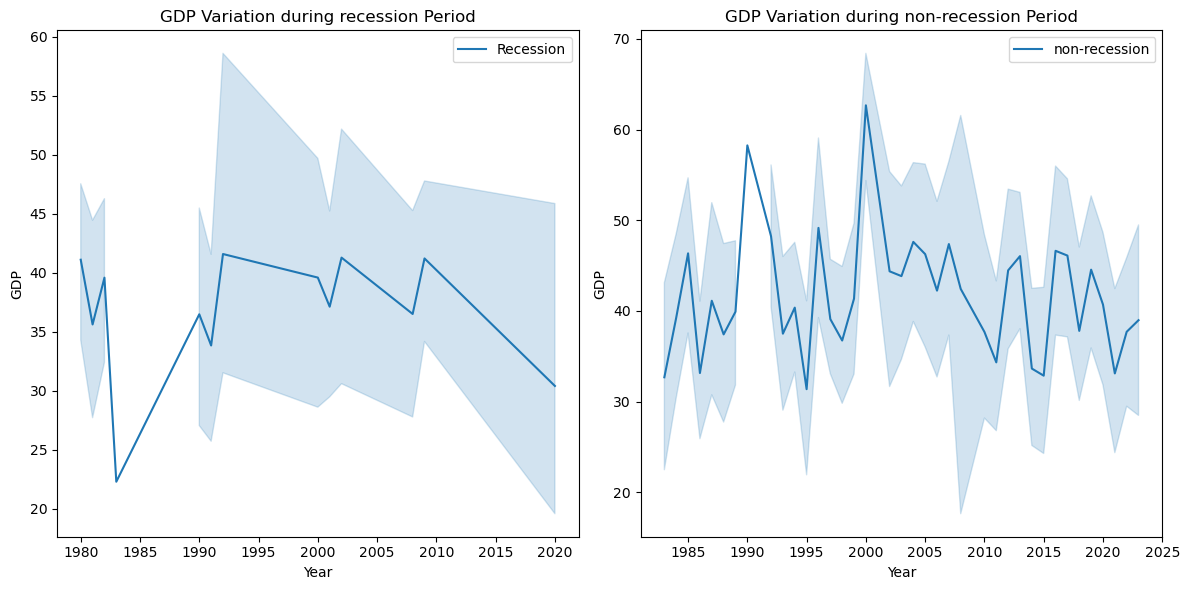

In [14]:
#Using subplot()
plt.figure(figsize=(12, 6))

#subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.title('GDP Variation during recession Period')

#subplot 1
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='non-recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.title('GDP Variation during non-recession Period')

plt.tight_layout()
plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


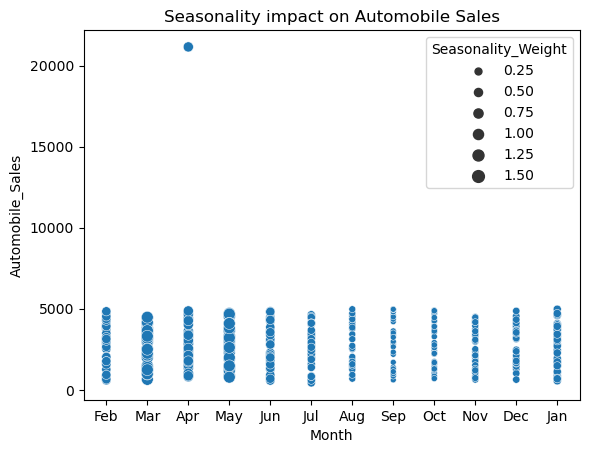

In [15]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


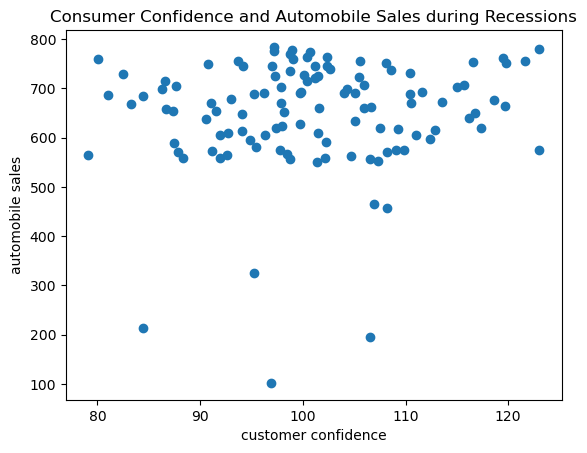

In [16]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('customer confidence')
plt.ylabel('automobile sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

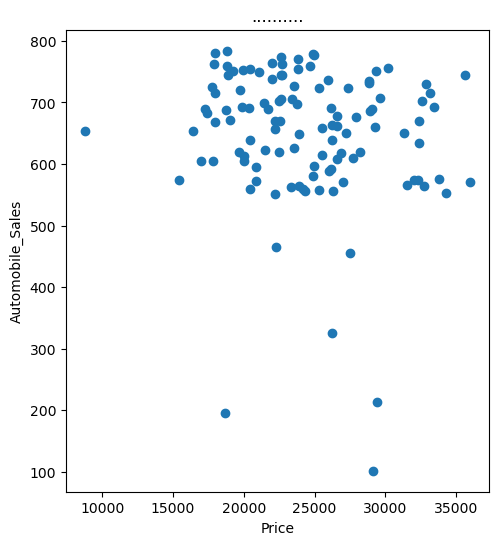

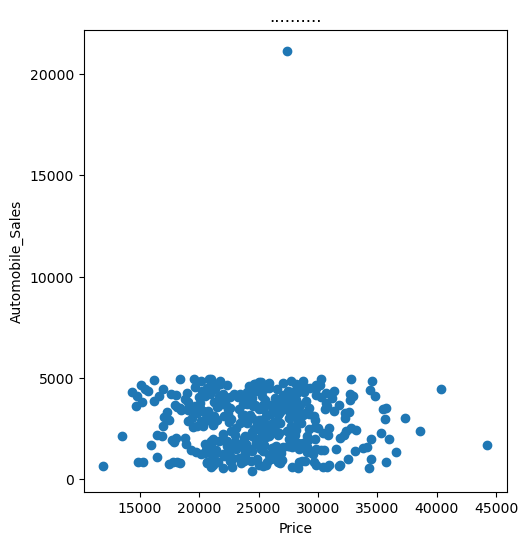

In [17]:
# Recession
plt.figure(figsize=(12, 6))
rec_data = df[df['Recession'] == 1]

plt.subplot(1, 2, 1)
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('..........')
plt.show()

# Non-recession
plt.figure(figsize=(12, 6))
non_rec_data = df[df['Recession'] == 0]

plt.subplot(1, 2, 2)
plt.scatter(non_recession_data['Price'], non_rec_data['Automobile_Sales'])

plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('..........')
plt.show()

 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


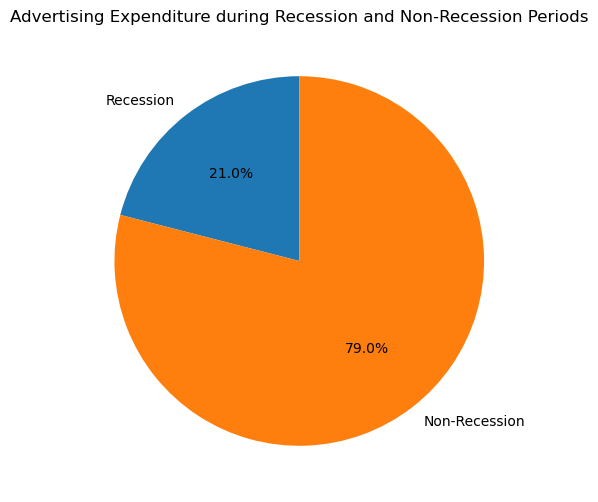

In [18]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total sales during recessions? 
#### Create another pie plot to display the total advertisement expenditure for each vehicle type


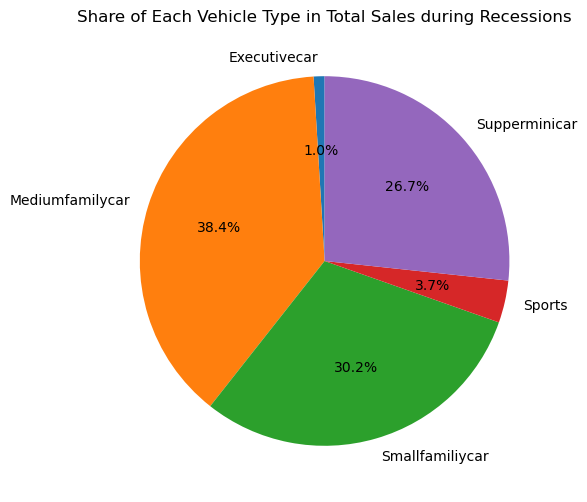

In [19]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

 ### TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a countplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


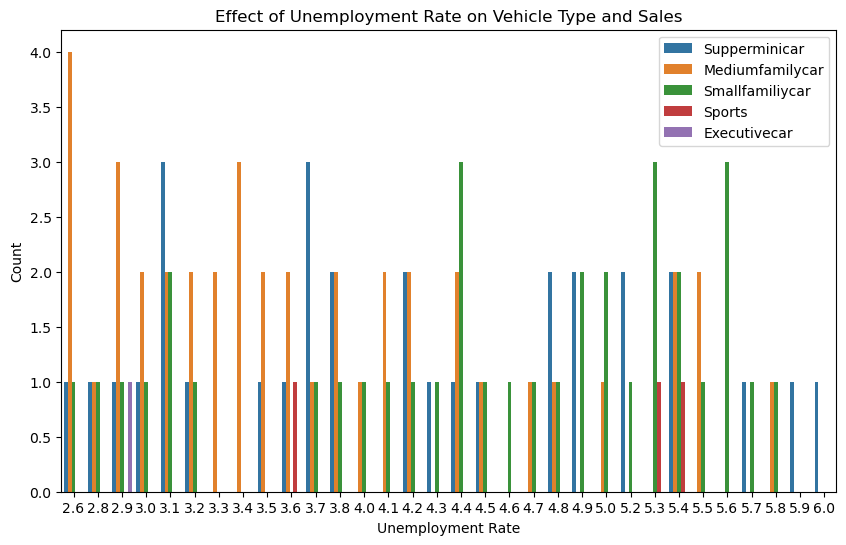

In [21]:
data= df[df['Recession'] == 1]
    
plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()